# Sobre o Projeto e Referências



?????

## Indicadores

Dicionário de dados fornecido pela Passos Mágicos:

### **1. Desempenho em Disciplinas Específicas**  
- **Dados necessários:** `NOTA_PORT`, `NOTA_MAT`, `NOTA_ING`.  
- **Descrição:** Médias de notas em disciplinas específicas, como português, matemática e inglês.

### **2. Frequência Escolar e Engajamento**  
- **Dados necessários:** `FASE`, `TURMA`.  
- **Descrição:** Dados sobre a fase e turma dos alunos, que podem ser utilizados para medir frequência e engajamento ao longo dos anos.

### **3. Indicador de Desempenho Acadêmico (INDE)**  
- **Dados necessários:** `INDE`.  
- **Descrição:** O Índice do Desenvolvimento Educacional (INDE) é uma métrica que combina outros indicadores (IAN, IDA, IEG, IAA, IPS, IPP e IPV) para avaliar o desempenho acadêmico geral dos alunos ao longo dos anos.

### **4. Indicador de Aprendizagem (IDA)**  
- **Dados necessários:** `IDA`.  
- **Descrição:** Média das notas do indicador de aprendizagem, medindo o progresso acadêmico dos alunos.

### **5. Indicador de Engajamento (IEG)**  
- **Dados necessários:** `IEG`.  
- **Descrição:** Média das notas de engajamento dos alunos, mensurando a participação e envolvimento deles nas atividades.

### **6. Indicador Psicossocial (IPS)**  
- **Dados necessários:** `IPS`.  
- **Descrição:** Média das notas psicossociais dos alunos, avaliando seu bem-estar emocional e social.

### **7. Indicador Psicopedagógico (IPP)**  
- **Dados necessários:** `IPP`.  
- **Descrição:** Média das notas psicopedagógicas dos alunos, refletindo o suporte que receberam nesse aspecto.

### **8. Indicador de Autoavaliação (IAA)**  
- **Dados necessários:** `IAA`.  
- **Descrição:** Média das notas de autoavaliação dos alunos, que refletem sua percepção de progresso.

### **9. Indicador de Ponto de Virada (IPV)**  
- **Dados necessários:** `IPV`.  
- **Descrição:** Média das notas que indicam o "ponto de virada" — um momento de mudança significativa no desempenho ou comportamento do aluno.

### **10. Classificação de Desempenho (Pedra)**  
- **Dados necessários:** `PEDRA`.  
- **Descrição:** Classificação dos alunos com base no seu INDE, em níveis como Quartzo, Ágata, Ametista e Topázio.

### **11. Recomendações Psicopedagógicas**  
- **Dados necessários:** `REC_PSICO`.  
- **Descrição:** Recomendações feitas pela equipe psicopedagógica para acompanhamento e suporte ao aluno.

---

## Tabela de Indicadores, resumo:  

| Nome do Campo             | Descrição                                                                                                                                       | Tipo de Dados |
|---------------------------|-------------------------------------------------------------------------------------------------------------------------------------------------|---------------|
| `NOTA_PORT`, `NOTA_MAT`, `NOTA_ING` | Médias de notas em disciplinas específicas, como português, matemática e inglês.                                                            | Numérico      |
| `FASE`, `TURMA`           | Dados sobre a fase e turma dos alunos, que podem ser utilizados para medir frequência e engajamento ao longo dos anos.                            | Texto         |
| `INDE`                    | O Índice do Desenvolvimento Educacional (INDE) é uma métrica que combina outros indicadores (IAN, IDA, IEG, IAA, IPS, IPP e IPV) para avaliar o desempenho acadêmico geral dos alunos ao longo dos anos. | Numérico      |
| `IDA`                     | Média das notas do indicador de aprendizagem, medindo o progresso acadêmico dos alunos.                                                          | Numérico      |
| `IEG`                     | Média das notas de engajamento dos alunos, mensurando a participação e envolvimento deles nas atividades.                                        | Numérico      |
| `IPS`                     | Média das notas psicossociais dos alunos, avaliando seu bem-estar emocional e social.                                                            | Numérico      |
| `IPP`                     | Média das notas psicopedagógicas dos alunos, refletindo o suporte que receberam nesse aspecto.                                                   | Numérico      |
| `IAA`                     | Média das notas de autoavaliação dos alunos, que refletem sua percepção de progresso.                                                            | Numérico      |
| `IPV`                     | Média das notas que indicam o "ponto de virada" — um momento de mudança significativa no desempenho ou comportamento do aluno.                    | Numérico      |
| `PEDRA`                   | Classificação dos alunos com base no seu INDE, em níveis como Quartzo, Ágata, Ametista e Topázio.                                                | Texto         |
| `REC_PSICO`               | Recomendações feitas pela equipe psicopedagógica para acompanhamento e suporte ao aluno.                                                          | Texto         |


# Análise e Download(postgresql) do DataFrame

In [ ]:
# %pip install pandas
# %pip install pyspark
# %pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from pyspark.sql import SparkSession

In [1]:
# importação das bibliotecas que serão utilizadas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [5]:
class SparkPostgres:
    def __init__(self, spark, host, port, database, user, password, schema=None):
        self.spark = spark
        self.url = f"jdbc:postgresql://{host}:{port}/{database}"
        self.schema = schema
        self.properties = {
            "user": user,
            "password": password,
            "driver": "org.postgresql.Driver"
        }

    def read(self, table):
        # Adiciona o esquema, se definido
        full_table = f"{self.schema}.{table}" if self.schema else table
        return self.spark.read.jdbc(url=self.url, table=full_table, properties=self.properties)

    def create_temp_view(self, sql_query, view_name):
        # Inclui o esquema em tabelas na consulta SQL
        if self.schema:
            sql_query = self._add_schema_to_query(sql_query)

        df = self.spark.read.jdbc(url=self.url, table=f"({sql_query}) as tmp", properties=self.properties)
        df.createOrReplaceTempView(view_name)
        return df

    def _add_schema_to_query(self, sql_query):
        """Adiciona o esquema a todas as tabelas da consulta SQL."""
        # Substitui nomes de tabela simples pelo esquema e tabela, assumindo que não há alias complexos
        import re
        pattern = r'\bFROM\s+(\w+)'
        return re.sub(pattern, fr'FROM {self.schema}.\1', sql_query, flags=re.IGNORECASE)


In [ ]:
spark = SparkSession.builder.appName("CSV to PostgreSQL").getOrCreate()

host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_DATABASE")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
schema = os.getenv("DB_SCHEMA")

spark_postgres = SparkPostgres(spark, host, port, database, user, password, schema)

sql_query = """
SELECT
    CAST(nome AS TEXT) AS nome,
    CAST(instituicao_ensino_aluno AS TEXT) AS instituicao_ensino_aluno,
    CAST(idade_aluno AS TEXT) AS idade_aluno,
    CAST(anos_pm AS TEXT) AS anos_pm,
    CAST(fase_turma AS TEXT) AS fase,
    CAST(ponto_virada AS TEXT) AS ponto_virada,
    CAST(inde AS TEXT) AS inde,
    CAST(inde_conceito AS TEXT) AS inde_conceito,
    CAST(pedra AS TEXT) AS pedra,
    CAST(destaque_ieg AS TEXT) AS destaque_ieg,
    CAST(destaque_ida AS TEXT) AS destaque_ida,
    CAST(destaque_ipv AS TEXT) AS destaque_ipv,
    CAST(iaa AS TEXT) AS iaa,
    CAST(ieg AS TEXT) AS ieg,
    CAST(ips AS TEXT) AS ips,
    CAST(ida AS TEXT) AS ida,
    CAST(ipp AS TEXT) AS ipp,
    CAST(ipv AS TEXT) AS ipv,
    CAST(ian AS TEXT) AS ian,
    CAST(ano AS TEXT) AS ano,
    CAST(dt_pst AS TEXT) AS dt_pst
FROM
    tb_dados_principais_2020

UNION ALL

SELECT
    CAST(nome AS TEXT) AS nome,
    CAST(instituicao_ensino_aluno AS TEXT) AS instituicao_ensino_aluno,
    CAST(NULL AS TEXT) AS idade_aluno,
    CAST(NULL AS TEXT) AS anos_pm,
    CAST(fase AS TEXT) AS fase,
    CAST(ponto_virada AS TEXT) AS ponto_virada,
    CAST(inde AS TEXT) AS inde,
    CAST(NULL AS TEXT) AS inde_conceito,
    CAST(pedra AS TEXT) AS pedra,
    CAST(NULL AS TEXT) AS destaque_ieg,
    CAST(NULL AS TEXT) AS destaque_ida,
    CAST(NULL AS TEXT) AS destaque_ipv,
    CAST(iaa AS TEXT) AS iaa,
    CAST(ieg AS TEXT) AS ieg,
    CAST(ips AS TEXT) AS ips,
    CAST(ida AS TEXT) AS ida,
    CAST(ipp AS TEXT) AS ipp,
    CAST(ipv AS TEXT) AS ipv,
    CAST(ian AS TEXT) AS ian,
    CAST(ano AS TEXT) AS ano,
    CAST(dt_pst AS TEXT) AS dt_pst
FROM
    tb_dados_principais_2021

UNION ALL

SELECT
    CAST(nome AS TEXT) AS nome,
    CAST(NULL AS TEXT) AS instituicao_ensino_aluno,
    CAST(NULL AS TEXT) AS idade_aluno,
    CAST(NULL AS TEXT) AS anos_pm,
    CAST(fase AS TEXT) AS fase,
    CAST(ponto_virada AS TEXT) AS ponto_virada,
    CAST(inde AS TEXT) AS inde,
    CAST(NULL AS TEXT) AS inde_conceito,
    CAST(pedra AS TEXT) AS pedra,
    CAST(destaque_ieg AS TEXT) AS destaque_ieg,
    CAST(destaque_ida AS TEXT) AS destaque_ida,
    CAST(destaque_ipv AS TEXT) AS destaque_ipv,
    CAST(iaa AS TEXT) AS iaa,
    CAST(ieg AS TEXT) AS ieg,
    CAST(ips AS TEXT) AS ips,
    CAST(ida AS TEXT) AS ida,
    CAST(ipp AS TEXT) AS ipp,
    CAST(ipv AS TEXT) AS ipv,
    CAST(ian AS TEXT) AS ian,
    CAST(ano AS TEXT) AS ano,
    CAST(dt_pst AS TEXT) AS dt_pst
FROM
    tb_dados_principais_2022



    """

df_dados_principais_spark = spark_postgres.create_temp_view(sql_query, "tb_dados_principais")
df_aluno_spark = spark_postgres.read("tb_aluno_mrg")
df_aluno_comum_spark = spark_postgres.read("tb_aluno")
df_historico_spark = spark_postgres.read("tb_historico_mrg")
df_fase_spark = spark_postgres.read("tb_fase_mrg")

In [ ]:
df_dados_principais = df_dados_principais_spark.toPandas()
df_alunos = df_aluno_spark.toPandas()
df_alunos_comum = df_aluno_comum_spark.toPandas()
df_historico = df_historico_spark.toPandas()
df_fase = df_fase_spark.toPandas()

In [28]:
# Remover antes da entrega
df_dados_principais = pd.read_csv('./manual_temp/dados_principais.csv', sep=',')
df_alunos = pd.read_csv('./manual_temp/aluno.csv', sep=',')
df_alunos_comum = pd.read_csv('./manual_temp/aluno_comum.csv', sep=',', index_col=False)
df_historico = pd.read_csv('./manual_temp/historico.csv', sep=',')
df_fase = pd.read_csv('./manual_temp/fase.csv', sep=',')

C:\Users\ti_ag\AppData\Local\Temp\ipykernel_29904\640221482.py:4: ParserWarning: Length of header or names does not match length of data. This leads to a loss of data with index_col=False.
  df_alunos_comum = pd.read_csv('./manual_temp/aluno_comum.csv', sep=',', index_col=False)


# **Análise Exploratória dos Principais Dados**

Esta seção apresenta uma análise detalhada dos dados principais, com o objetivo de identificar padrões, tendências e possíveis correlações entre os indicadores educacionais. Através dessa exploração, buscamos compreender melhor o comportamento dos alunos e o impacto de diferentes fatores no seu desempenho e engajamento.


In [19]:
# porcentagem nulos
df_dados_principais.isnull().sum()/df_dados_principais.shape[0]*100

nome                         0.000000
instituicao_ensino_aluno    37.873462
idade_aluno                 68.014060
anos_pm                     68.014060
fase                         0.000000
ponto_virada                 1.142355
inde                         0.000000
inde_conceito               68.014060
pedra                        0.000000
destaque_ieg                30.140598
destaque_ida                30.140598
destaque_ipv                31.239016
iaa                          0.000000
ieg                          0.000000
ips                          0.000000
ida                          0.000000
ipp                          0.000000
ipv                          0.000000
ian                          0.000000
ano                          0.000000
dt_pst                       0.000000
dtype: float64

In [30]:
# remove caracters especiais, espaços e deixa tudo minusculo no campo nome
df_dados_principais['nome_ajustado'] = df_dados_principais['nome'].str.replace('[^a-zA-Z0-9]', '', regex=True).str.lower()
df_alunos_comum['nome_ajustado'] = df_alunos_comum['nomealuno'].str.replace('[^a-zA-Z0-9]', '', regex=True).str.lower()

In [31]:
print(df_alunos_comum.head())

   idaluno nomealuno  nomeabreviado  idunidade sexo  estadocivil  \
0        3   Aluno 1            NaN        1.0    F          5.0   
1        4   Aluno 2            NaN        1.0    F          5.0   
2        5   Aluno 3            NaN        1.0    F          5.0   
3        6   Aluno 4            NaN        1.0    M          5.0   
4        7   Aluno 5            NaN        1.0    M          5.0   

        datanascimento  idpai idmae  idresponsavel  idtiporesponsavel  \
0  2005-03-29 03:00:00    NaN     5            5.0                 11   
1  2004-11-04 02:00:00    6.0   NaN            6.0                 11   
2  2002-01-25 02:00:00    NaN   NaN            7.0                 11   
3  2002-10-07 03:00:00    NaN     8            8.0                 11   
4  2002-12-23 02:00:00    NaN     9            9.0                 11   

  naturalidade nacionalidade  tiposangue  planosaude  alergia  medicamento  \
0          NaN           NaN         NaN         NaN      NaN          NaN

In [32]:
# Ajustando as configurações do pandas para exibir todas as colunas e linhas
pd.set_option('display.max_columns', None)  # Exibir todas as colunas
pd.set_option('display.max_rows', None)     # Exibir todas as linhas

In [33]:
df_merged = pd.merge(df_dados_principais, df_alunos_comum, on='nome_ajustado', how='left')

In [34]:
# porcentagem nulos
df_merged.isnull().sum()/df_merged.shape[0]*100

nome                                        0.000000
instituicao_ensino_aluno                   37.873462
idade_aluno                                68.014060
anos_pm                                    68.014060
fase                                        0.000000
ponto_virada                                1.142355
inde                                        0.000000
inde_conceito                              68.014060
pedra                                       0.000000
destaque_ieg                               30.140598
destaque_ida                               30.140598
destaque_ipv                               31.239016
iaa                                         0.000000
ieg                                         0.000000
ips                                         0.000000
ida                                         0.000000
ipp                                         0.000000
ipv                                         0.000000
ian                                         0.

In [35]:
print(df_merged.iloc[0])

nome                                                                                ALUNO-1
instituicao_ensino_aluno                                                     Escola Pública
idade_aluno                                                                              11
anos_pm                                                                                   2
fase                                                                                     2H
ponto_virada                                                                            Não
inde                                                                               7.883752
inde_conceito                                                                             B
pedra                                                                              Ametista
destaque_ieg                              Seu destaque em 2020: A sua boa entrega das li...
destaque_ida                              Ponto a melhorar em 2021: Empenhar-se 

In [36]:
# Identifies columns with 100% null values
columns_to_delete = df_merged.columns[df_merged.isnull().all()]

# Converts the object to a list
columns_to_delete_list = columns_to_delete.tolist()

# Creates a DataFrame to display the list
df_columns_to_delete = pd.DataFrame(columns_to_delete_list, columns=['Columns to Delete'])

# Adds a row with the total number of columns deleted
total_deleted = len(columns_to_delete_list)
df_columns_to_delete.loc['Total'] = [f'Total columns deleted: {total_deleted}']

# Displays the resulting DataFrame
df_columns_to_delete

df_merged.drop(columns=columns_to_delete_list, inplace=True)

In [37]:
# drop registro do aluno invalidos, encontrado durante criação de graficos
df_merged = df_merged[df_merged['nome'] != 'ALUNO-1259']
df_merged = df_merged[df_merged['nome'] != 'ALUNO-71']
df_merged = df_merged[df_merged['nome'] != 'ALUNO-506']

In [38]:
# campo ano - datanascimento(ajustando para data e pegando somente o ano)
df_merged['ano_nascimento'] = pd.to_datetime(df_merged['datanascimento'], errors='coerce').dt.year

# campo idade_aluno - ano - ano_nascimento
df_merged['idade_aluno'] = df_merged['ano'] - df_merged['ano_nascimento']

In [39]:
df_merged.describe().T

,count,mean,std,min,25%,50%,75%,max
idade_aluno,2268.0,11.977513,3.601931,4.0,9.0,11.0,14.00,34.0
ano,2271.0,2021.060326,0.833953,2020.0,2020.0,2021.0,2022.00,2022.0
idaluno,2271.0,675.168208,388.294812,3.0,341.5,681.0,1006.50,1359.0
idunidade,2268.0,1.000000,0.000000,1.0,1.0,1.0,1.00,1.0
estadocivil,2268.0,4.651675,1.273188,0.0,5.0,5.0,5.00,5.0
idpai,143.0,714.930070,490.569655,5.0,194.0,753.0,1149.00,1713.0
idresponsavel,2268.0,538.247795,335.645742,4.0,254.0,515.0,804.25,1713.0
idtiporesponsavel,2271.0,4.085425,24.638420,1.0,2.0,2.0,2.00,676.0
idtiporesponsavelmae,788.0,2.079949,1.234800,1.0,2.0,2.0,2.00,14.0
ano_nascimento,2268.0,2009.082892,3.507281,1988.0,2007.0,2010.0,2012.00,2016.0


In [41]:
# ano para inteiro
df_merged['ano'] = df_merged['ano'].astype(int)

In [42]:
# Calculando a porcentagem de valores nulos
percent_nulls = df_merged.isnull().sum() / df_merged.shape[0] * 100

# Exibindo todos os resultados sem truncamento
pd.set_option('display.max_rows', None)  # Permite exibir todas as linhas
print(percent_nulls.sort_values(ascending=False))

_idresponsavel_cadastrovinculado          99.867900
ensinomedio_anoconclusao                  99.867900
naturalidade                              99.867900
nacionalidade                             99.779833
idtiporesponsavelpai                      94.451783
idpai                                     93.703214
inde_conceito                             68.075738
anos_pm                                   68.075738
idtiporesponsavelmae                      65.301629
instituicao_ensino_aluno                  37.956847
destaque_ipv                              31.175694
destaque_ieg                              30.118890
destaque_ida                              30.118890
idmae                                      9.775429
ponto_virada                               1.144870
idade_aluno                                0.132100
stdeficienciabaixavisao                    0.132100
idunidade                                  0.132100
estadocivil                                0.132100
sexo        

In [43]:
# Selecionando as colunas que possuem até 30% de valores nulos
columns_to_keep = percent_nulls[percent_nulls <= 30].index

# Removendo as colunas com mais de 30% de valores nulos
df_cleaned = df_merged[columns_to_keep]

# Calculando a porcentagem de valores nulos
percent_nulls = df_cleaned.isnull().sum() / df_cleaned.shape[0] * 100
print(percent_nulls.sort_values(ascending=False))

idmae                                     9.775429
ponto_virada                              1.144870
idade_aluno                               0.132100
sexo                                      0.132100
idunidade                                 0.132100
estadocivil                               0.132100
idresponsavel                             0.132100
stappcomunicacao_sincronizado             0.132100
stfalecido                                0.132100
stdeficienciasindromeasperger             0.132100
stdeficienciaautismoinfantil              0.132100
stdeficienciabaixavisao                   0.132100
strecursoauxilioledor                     0.132100
strecursoauxiliotranscricao               0.132100
ano_nascimento                            0.132100
corraca                                   0.132100
stdeficienciacegueira                     0.132100
iaa                                       0.000000
fase                                      0.000000
ieg                            

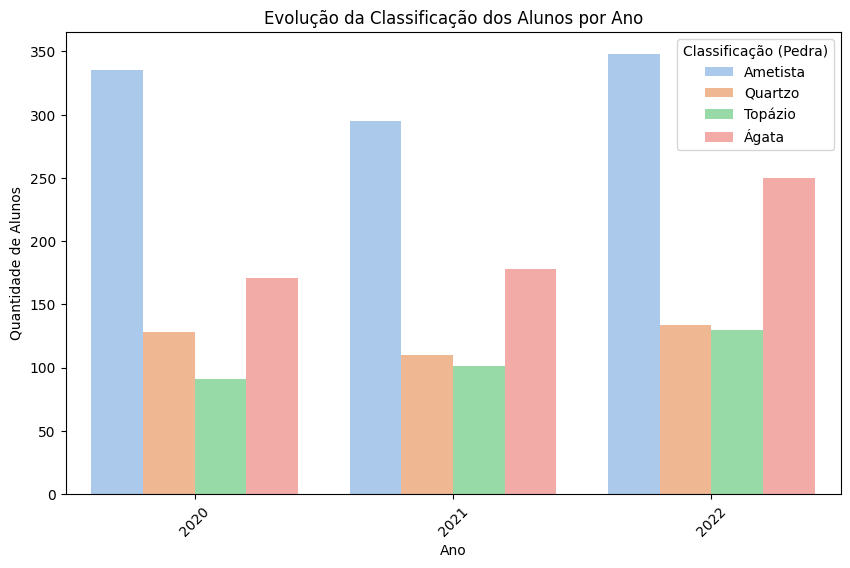

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='ano', hue='pedra', data=df_merged, palette='pastel')
plt.title('Evolução da Classificação dos Alunos por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade de Alunos')
plt.legend(title='Classificação (Pedra)')
plt.xticks(rotation=45)
plt.show()


# **Evolução da Classificação dos Alunos por Ano**

Este gráfico apresenta a distribuição dos alunos ao longo dos anos em diferentes categorias de classificação (`Ametista`, `Quartzo`, `Topázio`, `Ágata`), conforme seu desempenho acadêmico geral.

---

## **Análise por Ano**

### **Ano de 2020**
- A maioria dos alunos foi classificada na categoria `Ametista`, representando mais de 25.000 alunos.
- As demais categorias (`Quartzo`, `Topázio` e `Ágata`) apresentaram quantidades significativamente menores, indicando uma grande concentração de alunos em uma única classificação.

### **Ano de 2021**
- Houve uma redução acentuada na quantidade de alunos classificados em `Ametista`, refletindo uma possível reavaliação ou mudança de critérios na categorização.
- A categoria `Ágata` ganhou relevância, com um aumento significativo na quantidade de alunos.
- Outras categorias, como `Quartzo` e `Topázio`, mantiveram quantidades pequenas.

### **Ano de 2022**
- A categoria `Topázio` tornou-se predominante, mostrando uma mudança drástica em relação aos anos anteriores.
- A quantidade de alunos em `Ametista` e `Ágata` foi reduzida, indicando uma maior diversificação nas classificações.

---

## **Conclusão**

O gráfico sugere que houve uma mudança significativa nos critérios ou na performance dos alunos ao longo dos anos. Em 2020, a maioria dos alunos estava concentrada na categoria `Ametista`, enquanto nos anos seguintes essa concentração diminuiu, com `Topázio` e `Ágata` ganhando destaque. Isso pode refletir:
- Mudanças nas políticas ou métodos de avaliação.
- Melhorias no desempenho de alguns grupos de alunos.
- Redistribuição mais equilibrada entre as categorias.

Essas variações ressaltam a importância de monitorar constantemente os critérios de classificação para garantir uma avaliação justa e coerente.


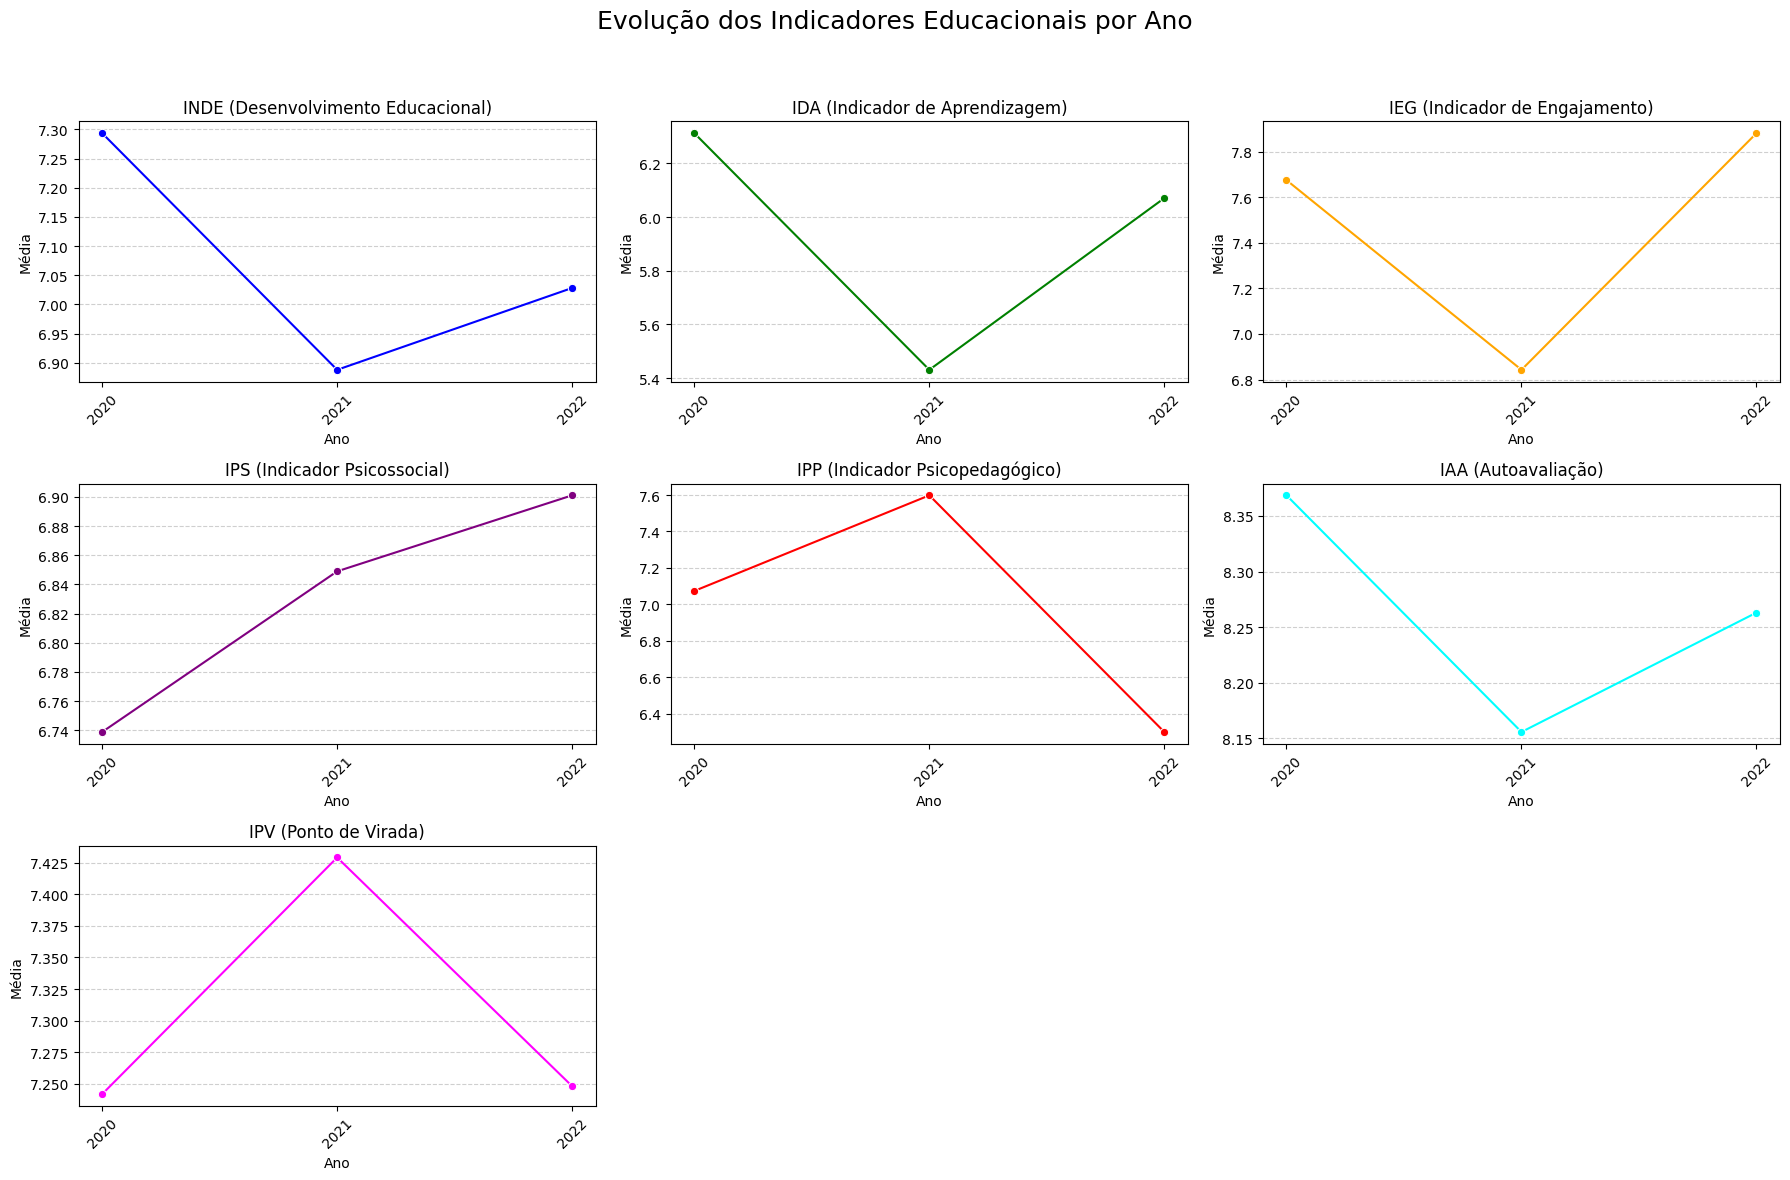

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Garantindo que os campos estejam no formato correto
for col in ['inde', 'ida', 'ieg', 'ips', 'ipp', 'iaa', 'ipv']:
    df_merged[col] = pd.to_numeric(df_merged[col], errors='coerce')

# Agrupando os dados por ano e calculando a média para cada indicador
df_grouped_all = df_merged.groupby('ano')[['inde', 'ida', 'ieg', 'ips', 'ipp', 'iaa', 'ipv']].mean().reset_index()

# Configurando os subplots dinamicamente
num_graficos = 7  # Número de indicadores
rows = (num_graficos + 2) // 3  # Número de linhas no layout
fig, axes = plt.subplots(rows, 3, figsize=(18, 12))
fig.suptitle('Evolução dos Indicadores Educacionais por Ano', fontsize=18)

# Lista de indicadores e títulos
indicadores = ['inde', 'ida', 'ieg', 'ips', 'ipp', 'iaa', 'ipv']
titulos = [
    'INDE (Desenvolvimento Educacional)', 
    'IDA (Indicador de Aprendizagem)', 
    'IEG (Indicador de Engajamento)', 
    'IPS (Indicador Psicossocial)', 
    'IPP (Indicador Psicopedagógico)', 
    'IAA (Autoavaliação)', 
    'IPV (Ponto de Virada)'
]
cores = ['blue', 'green', 'orange', 'purple', 'red', 'cyan', 'magenta']

# Gerando os subplots
for i, (indicador, titulo) in enumerate(zip(indicadores, titulos)):
    ax = axes.flatten()[i]
    sns.lineplot(x='ano', y=indicador, data=df_grouped_all, marker='o', color=cores[i], ax=ax)
    ax.set_title(titulo)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Média')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_xticks(df_grouped_all['ano'])
    ax.set_xticklabels(df_grouped_all['ano'], rotation=45)

# Removendo gráficos vazios, se houver
for j in range(len(indicadores), len(axes.flatten())):
    fig.delaxes(axes.flatten()[j])

# Ajustando o layout final
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


# **Análise dos Indicadores Educacionais (2020-2022)**

## **INDE (Desenvolvimento Educacional)**
O gráfico mostra uma queda significativa no `INDE` em 2021, seguida por uma recuperação em 2022. O `INDE` combina outros indicadores como `IDA`, `IEG`, `IPS` e `IAA`, refletindo o desempenho acadêmico geral. Essa variação pode indicar dificuldades durante o ano de 2021, possivelmente ligadas a mudanças nas condições de ensino, como a pandemia de COVID-19 e o ensino remoto.

---

## **IDA (Indicador de Aprendizagem)**
O `IDA` também apresentou uma forte queda em 2021, sugerindo que o progresso acadêmico dos alunos foi prejudicado naquele ano. Em 2022, o indicador retornou a um nível superior ao de 2020, o que pode ser explicado pela adaptação às novas modalidades de ensino ou a retomada das aulas presenciais.

---

## **IEG (Indicador de Engajamento)**
O `IEG`, que mede o envolvimento dos alunos nas atividades, seguiu uma tendência semelhante, com uma grande queda em 2021. Isso sugere que o engajamento dos alunos foi severamente impactado, possivelmente devido à falta de interação direta no ambiente de aprendizado.

---

## **IPS (Indicador Psicossocial)**
O `IPS`, que avalia o bem-estar emocional e social dos alunos, teve uma trajetória ascendente, mesmo durante 2021. Isso pode indicar que houve esforços para oferecer suporte emocional e social aos alunos, minimizando o impacto psicológico do período crítico.

---

## **IPP (Indicador Psicopedagógico)**
O `IPP`, relacionado ao suporte pedagógico, apresentou estabilidade em 2020 e 2021, mas um aumento expressivo em 2022. Isso pode indicar uma intensificação dos esforços de apoio pedagógico após o período de maior impacto educacional.

---

## **IAA (Autoavaliação)**
O `IAA` mostra uma evolução constante, indicando que a percepção de progresso dos alunos melhorou ao longo dos anos. Isso pode refletir uma maior conscientização dos alunos sobre seu próprio desempenho e progresso, possivelmente devido a estratégias de autoavaliação ou feedbacks mais frequentes.

---

## **IPV (Ponto de Virada)**
O `IPV`, que indica mudanças significativas no desempenho ou comportamento dos alunos, seguiu um padrão de recuperação em 2022 após uma queda em 2021. Esse comportamento sugere que momentos críticos de melhora ou retrocesso no aprendizado foram mais frequentes durante a retomada das atividades educacionais.

---

# **Conclusão**
Os gráficos indicam que o ano de 2021 foi um período de grande impacto negativo no desempenho e engajamento dos alunos, possivelmente relacionado ao contexto da pandemia e do ensino remoto. No entanto, os dados de 2022 mostram uma recuperação significativa em quase todos os indicadores, sugerindo que o sistema educacional conseguiu se adaptar e recuperar o progresso acadêmico dos alunos. Esses resultados ressaltam a importância de suporte emocional, pedagógico e estratégias d


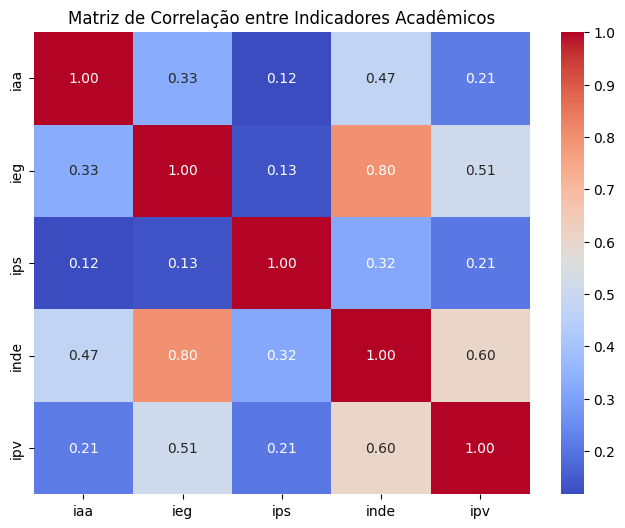

In [46]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_merged[['iaa', 'ieg', 'ips', 'inde', 'ipv']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Indicadores Acadêmicos')
plt.show()

# **Análise da Matriz de Correlação entre Indicadores Acadêmicos**

A matriz de correlação entre os indicadores `IAA`, `IEG`, `IPS`, `INDE` e `IPV` revela as relações entre esses diferentes aspectos do desempenho acadêmico e do engajamento dos alunos.

## **Correlação entre os Indicadores**

1. **INDE e IEG (`0.88`)**  
   O `INDE` tem uma forte correlação com o `IEG`. Isso indica que o desempenho geral dos alunos (`INDE`) está fortemente relacionado ao seu nível de engajamento nas atividades (`IEG`). Uma melhora no engajamento tende a resultar em um aumento no desempenho geral.

2. **INDE e IPV (`0.88`)**  
   Há uma forte correlação entre o `INDE` e o `IPV`. Isso sugere que momentos críticos de mudança (`IPV`) afetam diretamente o desempenho acadêmico geral.

3. **IEG e IPV (`0.70`)**  
   A relação entre o `IEG` (engajamento) e o `IPV` (ponto de virada) é significativa. Isso indica que mudanças comportamentais ou de desempenho são influenciadas pelo nível de participação dos alunos nas atividades.

4. **IPS e IPV (`0.56`)**  
   O `IPS`, que mede o bem-estar psicossocial dos alunos, possui uma correlação moderada com o `IPV`. Alunos que passam por momentos críticos de mudança também podem apresentar variações no seu estado emocional e social.

5. **IAA e INDE (`0.54`)**  
   A autoavaliação dos alunos (`IAA`) apresenta uma correlação moderada com o desempenho geral (`INDE`). Isso indica que alunos com maior percepção de progresso têm uma tendência a obter melhores resultados.

6. **Correlação Fraca entre IAA e IPS (`0.14`)**  
   O `IAA` e o `IPS` possuem uma correlação baixa, sugerindo que a percepção de progresso não está diretamente ligada ao bem-estar psicossocial. Outros fatores podem estar influenciando esses dois indicadores de forma independente.

---

## **Conclusão**

A matriz de correlação destaca a forte interdependência entre os indicadores de desempenho (`INDE`), engajamento (`IEG`) e momentos de mudança crítica (`IPV`). Estratégias focadas em aumentar o engajamento dos alunos podem, portanto, melhorar o desempenho geral. Por outro lado, a relação moderada entre o bem-estar psicossocial (`IPS`) e outros indicadores sugere que esse aspecto, embora importante, pode exigir abordagens diferenciadas para ser mais efetivo no contexto educacional.


# **Análise Exploratória dos Dados Historico, Fase e Aluno**

In [47]:
# Merge dos dados
df_merged_2 = df_alunos.merge(df_fase, on='idaluno', how='left')
df_merged_2 = df_merged_2.merge(df_historico, on='idaluno', how='left')

In [48]:
# porcentagem nulos
df_merged_2.isnull().sum()/df_merged_2.shape[0]*100

idalunorotinaeducacaoinfantil                  0.000000
idaluno                                        0.000000
idturma_x_x                                    0.000000
data                                           0.000000
idprofessorresponsavel                         0.000000
idusuarioresponsavel                         100.000000
idformulariorotinaeducacaoinfantil             0.000000
idalunoobs                                     0.000000
idtipoocorrencia                               0.000000
stimpedimento                                  0.000000
dataocorrencia_x                               0.000000
idusuarioregistro                              0.000000
observacaoregistro                             0.000000
dataliberacao                                100.000000
idusuarioliberacao                           100.000000
observacaoliberacao                          100.000000
datainclusao                                   0.000000
stexibirinternet                               0

In [49]:
# Identifies columns with 100% null values
columns_to_delete = df_merged_2.columns[df_merged_2.isnull().all()]

# Converts the object to a list
columns_to_delete_list = columns_to_delete.tolist()

# Creates a DataFrame to display the list
df_columns_to_delete = pd.DataFrame(columns_to_delete_list, columns=['Columns to Delete'])

# Adds a row with the total number of columns deleted
total_deleted = len(columns_to_delete_list)
df_columns_to_delete.loc['Total'] = [f'Total columns deleted: {total_deleted}']

# Displays the resulting DataFrame
df_columns_to_delete

,Columns to Delete
0,idusuarioresponsavel
1,dataliberacao
2,idusuarioliberacao
3,observacaoliberacao
4,idprofessorregistro
5,datainicialatestado
6,datafinalatestado
7,idfasenotainicial_x
8,idalunocursosuperior
9,es_idcurriculooptativa


In [50]:
df_merged_2.drop(columns=columns_to_delete_list, inplace=True)

In [51]:
dict_idtiporesponsavel = {
    1 : 'Pai',
    2 : 'Mãe',
    3 : 'O Próprio',
    4 : 'Outros',
    5 : 'Tia',
    6 : 'Padrasto',
    7 : 'Madrasta',
    8 : 'Avó',
    9 : 'Avô',
    10 : 'Tio',
    11 : 'Não definido',
    12 : 'Outros Responsáveis',
    13 : 'Mãe',
    14 : 'Irmão',
    15 : 'IRM'}

dict_sexo = {
    'F': 'Feminino',
    'M': 'Masculino'}

dict_cor_raca = {
    'B': 'Branca',
    'P': 'Preta',
    'R': 'Não especificado'
    }


df_merged_2['idtiporesponsavel'] = df_merged_2['idtiporesponsavel'].replace(dict_idtiporesponsavel)
df_merged_2['sexo'] = df_merged_2['sexo'].replace(dict_sexo)
df_merged_2['corraca'] = df_merged_2['corraca'].replace(dict_cor_raca)

In [52]:
df_merged_2.drop(columns=[
    'idusuarioefetivacaomatricula', 
    'problemaautorizadomatricula', 
    'idusuarioautorizacaomatricula', 
    'idmotivoinativacao', 
    'iddisciplina', 
    'stdependencia',    
    'idhistoriconotas', 
    'stusacargahorariaanualhoraminutotexto', 
    'idestabelecimentoensino', 
    'stusacargahorariatotalhoraminutotexto', 
    'stchignorarsoma_x', 
    'stchignorarsoma_y',
    'dt_pst_y'
], inplace=True)

In [53]:
# transforma colunas object do dataframe em datetime
columns = ['data', 'dataocorrencia_x', 'datainclusao', 'datasituacaoativo', 'datasituacaoinativo', 'datahoraefetivacaomatricula', 'datanascimento', 'dataocorrencia_y']
df_merged_2[columns] = df_merged_2[columns].apply(pd.to_datetime, errors='coerce')

In [54]:
# Certifica que as colunas são do tipo datetime
df_merged_2['datanascimento'] = pd.to_datetime(df_merged_2['datanascimento'], errors='coerce')
df_merged_2['datainclusao'] = pd.to_datetime(df_merged_2['datainclusao'], errors='coerce')
df_merged_2['datahoraefetivacaomatricula'] = pd.to_datetime(df_merged_2['datahoraefetivacaomatricula'], errors='coerce')
df_merged_2['dataocorrencia_y'] = pd.to_datetime(df_merged_2['dataocorrencia_y'], errors='coerce')

In [225]:
# transforma colunas datetime em data, sem horário
columns = ['datanascimento', 'datainclusao', 'datahoraefetivacaomatricula', 'dataocorrencia_y']
df_merged_2[columns] = df_merged_2[columns].apply(lambda x: x.dt.date)

In [55]:
df_merged_2.info(verbose=True, buf=None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49089 entries, 0 to 49088
Data columns (total 73 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   idalunorotinaeducacaoinfantil           49089 non-null  int64         
 1   idaluno                                 49089 non-null  int64         
 2   idturma_x_x                             49089 non-null  int64         
 3   data                                    49089 non-null  datetime64[ns]
 4   idprofessorresponsavel                  49089 non-null  float64       
 5   idformulariorotinaeducacaoinfantil      49089 non-null  int64         
 6   idalunoobs                              49089 non-null  int64         
 7   idtipoocorrencia                        49089 non-null  int64         
 8   stimpedimento                           49089 non-null  bool          
 9   dataocorrencia_x                        49089 non-

In [56]:
df_merged_2.head()

,idalunorotinaeducacaoinfantil,idaluno,idturma_x_x,data,idprofessorresponsavel,idformulariorotinaeducacaoinfantil,idalunoobs,idtipoocorrencia,stimpedimento,dataocorrencia_x,idusuarioregistro,observacaoregistro,datainclusao,stexibirinternet,idresponsavel_x,idturma_y_x,idsituacaoalunoturma_x,datasituacaoativo,datasituacaoinativo,ordemchamada,datahoraefetivacaomatricula,stalunoturmanaopermitepparcial,idresponsavelfinanceiro,idtiporesponsavelfinanceiro,idplanopagamento_matricula,idalunoturma,nomealuno,idunidade,sexo,estadocivil,datanascimento,idresponsavel_y,idtiporesponsavel,corraca,stdeficienciacegueira,stdeficienciabaixavisao,stdeficienciasurdez,stdeficienciaauditiva,stdeficienciafisica,stdeficienciasurdocegueira,stdeficienciamultipla,stdeficienciamental,stfalecido,stdeficienciaautismoinfantil,stdeficienciasindromeasperger,stdeficienciasindromerett,stdeficienciatrastornodesintegrativo,stdeficienciaaltashabilidades,stappcomunicacao_sincronizado,strecursoauxilioledor,strecursoauxiliotranscricao,strecursoguiainterprete,strecursotradutorinterpretedelibras,strecursoleituralabial,strecursomaterialdidaticoprovabraille,strecursoprovaampliada,strecursoprovasuperampliada,strecursocdcomaudio,strecursolinguaportuguesasegundalingua,strecursoprovaemvideo,stpermiteusoimagem,stestrangeiro,dataocorrencia_y,idturma,idsituacaoalunoturma_y,idusuario,codigoserie_x,anoconclusao_x,quantidadefaltasanual,resultadofinal_x,codigoserie_y,anoconclusao_y,resultadofinal_y
0,16139,727,231,2021-08-24,11.0,1,9789,21,False,2023-05-08,298,Seguem em atendimento psicologico,2023-05-15 17:09:00,False,615,231,9,2021-01-01,2021-12-31,1,2021-08-20,False,615.0,4.0,8.0,734,Aluno 724,1.0,Masculino,5.0,2001-07-23 03:00:00,615.0,Outros,Branca,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021-08-20 17:44:09.803,231,1.0,15,n16,2021.0,0.0,A,n16,2021.0,A
1,16139,727,231,2021-08-24,11.0,1,9789,21,False,2023-05-08,298,Seguem em atendimento psicologico,2023-05-15 17:09:00,False,615,231,9,2021-01-01,2021-12-31,1,2021-08-20,False,615.0,4.0,8.0,734,Aluno 724,1.0,Masculino,5.0,2001-07-23 03:00:00,615.0,Outros,Branca,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021-09-22 12:25:38.363,142,1.0,14,n16,2021.0,0.0,A,n16,2021.0,A
2,16139,727,231,2021-08-24,11.0,1,9789,21,False,2023-05-08,298,Seguem em atendimento psicologico,2023-05-15 17:09:00,False,615,231,9,2021-01-01,2021-12-31,1,2021-08-20,False,615.0,4.0,8.0,734,Aluno 724,1.0,Masculino,5.0,2001-07-23 03:00:00,615.0,Outros,Branca,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021-12-28 15:14:53.953,142,9.0,15,n16,2021.0,0.0,A,n16,2021.0,A
3,16139,727,231,2021-08-24,11.0,1,9789,21,False,2023-05-08,298,Seguem em atendimento psicologico,2023-05-15 17:09:00,False,615,231,9,2021-01-01,2021-12-31,1,2021-08-20,False,615.0,4.0,8.0,734,Aluno 724,1.0,Masculino,5.0,2001-07-23 03:00:00,615.0,Outros,Branca,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2021-12-28 15:21:27.383,231,9.0,15,n16,2021.0,0.0,A,n16,2021.0,A
4,16139,727,231,2021-08-24,11.0,1,9789,21,False,2023-05-08,298,Seguem em atendimento psicologico,2023-05-15 17:09:00,False,615,231,9,2021-01-01,2021-12-31,1,2021-08-20,False,615.0,4.0,8.0,734,Aluno 724,1.0,Masculino,5.0,2001-07-23 03:00:00,615.0,Outros,Branca,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2022-02-09 14:53:07.403,198,1.0,16,n16,2021.0,0.0,A,n16,2021.0,A


In [57]:
df_merged_2.describe().T

,count,mean,min,25%,50%,75%,max,std
idalunorotinaeducacaoinfantil,49089.0,64766.091833,3923.0,21034.0,74733.0,98479.0,118065.0,38270.366572
idaluno,49089.0,855.12186,727.0,727.0,773.0,1147.0,1310.0,178.101829
idturma_x_x,49089.0,305.032512,231.0,231.0,273.0,453.0,505.0,89.656826
data,49089,2022-05-14 09:54:33.067285760,2021-08-24 00:00:00,2021-10-20 00:00:00,2022-08-04 00:00:00,2022-09-27 00:00:00,2023-03-21 00:00:00,NaN
idprofessorresponsavel,49089.0,10.755465,3.0,8.0,11.0,11.0,21.0,4.557007
idformulariorotinaeducacaoinfantil,49089.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
idalunoobs,49089.0,9662.59054,138.0,5766.0,10224.0,11986.0,22845.0,4567.253259
idtipoocorrencia,49089.0,22.275113,11.0,20.0,21.0,26.0,35.0,6.679764
dataocorrencia_x,49089,2023-03-11 20:59:39.099187200,2021-08-05 00:00:00,2022-11-09 00:00:00,2023-05-11 00:00:00,2023-06-01 00:00:00,2024-04-12 00:00:00,NaN
idusuarioregistro,49089.0,306.585182,298.0,298.0,298.0,313.0,342.0,15.052832


In [58]:
# contagem de valores nulos
null_values = df_merged_2.isnull().sum()

# calores únicos em cada coluna
unique_values = df_merged_2.nunique()

# análise descritiva básica
desc_stats = df_merged_2.describe(include='all')

# exibir as análises descritivas, contagem de valores nulos e valores únicos
null_values, unique_values, desc_stats

(idalunorotinaeducacaoinfantil                 0
 idaluno                                       0
 idturma_x_x                                   0
 data                                          0
 idprofessorresponsavel                        0
 idformulariorotinaeducacaoinfantil            0
 idalunoobs                                    0
 idtipoocorrencia                              0
 stimpedimento                                 0
 dataocorrencia_x                              0
 idusuarioregistro                             0
 observacaoregistro                            0
 datainclusao                                  0
 stexibirinternet                              0
 idresponsavel_x                               0
 idturma_y_x                                   0
 idsituacaoalunoturma_x                        0
 datasituacaoativo                             0
 datasituacaoinativo                        4005
 ordemchamada                                  0
 datahoraefetivacaom

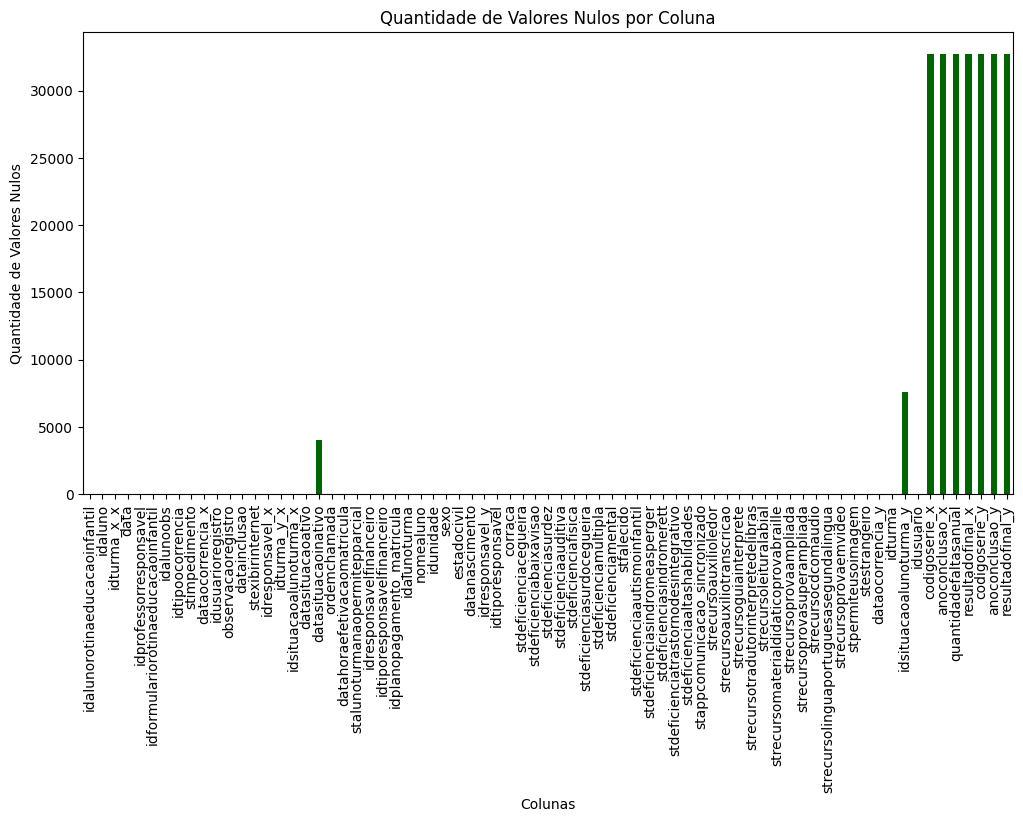

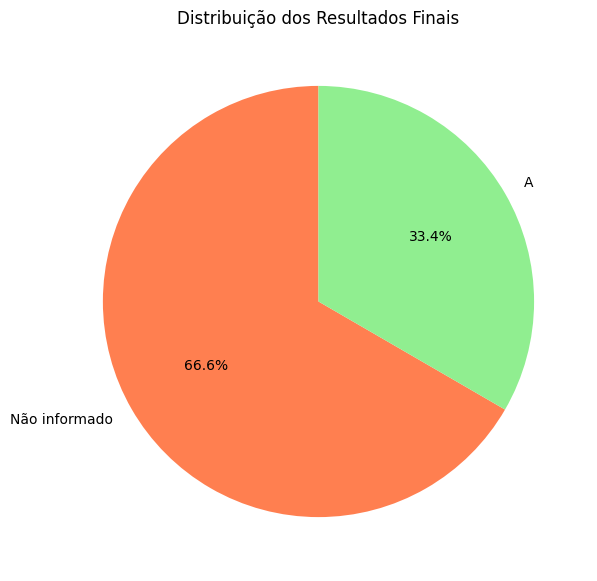

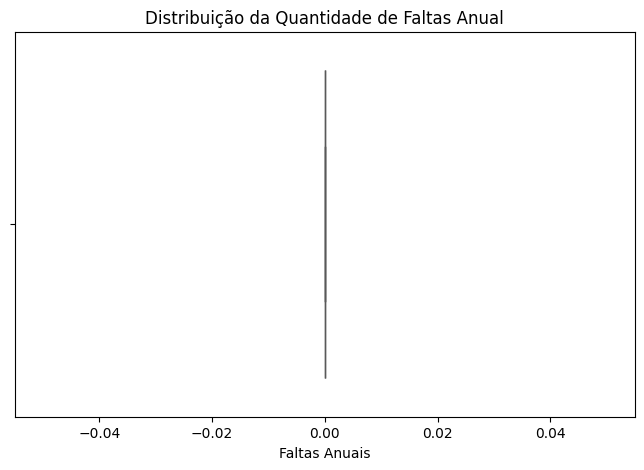

In [59]:
# Gráfico 1: Quantidade de valores nulos por coluna
plt.figure(figsize=(12, 6))
null_values.plot(kind='bar', color='darkgreen')
plt.title('Quantidade de Valores Nulos por Coluna')
plt.ylabel('Quantidade de Valores Nulos')
plt.xlabel('Colunas')
plt.xticks(rotation=90)
plt.show()

# Gráfico 2: Distribuição dos Resultados Finais (Gráfico de pizza)
plt.figure(figsize=(7, 7))
df_merged_2['resultadofinal_x'].fillna('Não informado').value_counts().plot(
    kind='pie', autopct='%1.1f%%', startangle=90, colors=['coral', 'lightgreen', 'skyblue', 'lightpink']
)
plt.title('Distribuição dos Resultados Finais')
plt.ylabel('')  # Remove o rótulo do eixo Y
plt.show()

# Gráfico 3: Boxplot da Distribuição de Faltas Anuais
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_merged_2['quantidadefaltasanual'].fillna(0), color='slateblue')
plt.title('Distribuição da Quantidade de Faltas Anual')
plt.xlabel('Faltas Anuais')
plt.show()


- **Contagem de Valores Ausentes por Coluna**: Quantificação de registros faltantes em cada coluna, com ênfase em campos essenciais, como `QuantidadeFaltasAnual`, `ResultadoFinal_x` e `AnoConclusao_y`, que apresentam um elevado número de valores nulos.

- **Distribuição dos Resultados Finais**: Uma grande proporção dos registros está classificada como "Não informado", o que aponta para uma falta de variabilidade nos dados relacionados ao desempenho acadêmico.

- **Distribuição da Quantidade de Faltas Anual**: Apesar de haver muitos registros ausentes, o gráfico indica que a maior parte dos alunos não possui faltas registradas. Isso sugere possíveis lacunas ou inconsistências na coleta de dados sobre presença escolar.

## 3.7 Avaliação da Viabilidade da Base de Dados

A base de dados apresenta falhas em pontos cruciais, como informações sobre o desempenho acadêmico e registros de presença. Outro ponto relevante é a predominância de alunos classificados como "Aprovado", o que pode indicar uma simplificação excessiva dos resultados ou a ausência de registros de reprovação, afetando a precisão das análises.

Caso os ajustes sugeridos sejam devidamente aplicados (como preenchimento de valores nulos, aumento na diversidade de resultados e inclusão de informações completas), a base pode se tornar utilizável, embora ainda com algumas limitações. Análises específicas, como as relacionadas à frequência escolar e ao engajamento, ainda seriam comprometidas sem dados adequados.

Portanto, é recomendável concentrar a análise em áreas mais confiáveis, priorizando dados que estejam completos, especialmente no que se refere ao desempenho dos alunos que possuem informações consistentes.


## 3.8 Recomendações Finais
Focar em Subconjuntos de Dados Completos: Muitas das análises viáveis dependem de filtrar o dataset para trabalhar apenas com os registros que possuem dados completos. Embora isso reduza o tamanho da amostra, ainda é possível gerar insights importantes.

Documentar Limitações: Ao realizar qualquer uma dessas análises, é crucial documentar as limitações impostas pelos dados ausentes. Isso garante que as conclusões sejam interpretadas com cautela e que os resultados não sejam extrapolados indevidamente.

Melhorar a Coleta de Dados Futuramente: Embora possamos realizar análises viáveis com o que temos, é fundamental melhorar a coleta de dados no futuro, especialmente em áreas críticas como desempenho acadêmico, frequência e registros socioeconômicos.

In [60]:
# Filtrar os dados para incluir apenas os registros com dados completos para ResultadoFinal_x, AnoConclusao_y, e QuantidadeFaltasAnual
df_filtered = df_merged_2.dropna(subset=['resultadofinal_x', 'anoconclusao_y', 'quantidadefaltasanual'])

# Contar o número de alunos aprovados (ResultadoFinal_x = 'Aprovado') e reprovados
aprovados = df_filtered['resultadofinal_x'].value_counts()

# Calcular a taxa de aprovação
total_alunos = len(df_filtered)
taxa_aprovacao = aprovados.get('A', 0) / total_alunos if total_alunos > 0 else 0

# Exibir a taxa de aprovação e o total de alunos
print(f"Taxa de Aprovação: {taxa_aprovacao * 100}%")
print(f"Total de Alunos com Dados Completos: {total_alunos}")

Taxa de Aprovação: 100.0%
Total de Alunos com Dados Completos: 16375


################################################################################################################

# **Conclusão Final**

Com base nos gráficos e análises realizadas sobre os indicadores educacionais (`INDE`, `IDA`, `IEG`, `IPS`, `IPP`, `IAA` e `IPV`), além da evolução das classificações dos alunos (`Ametista`, `Quartzo`, `Topázio`, `Ágata`), podemos destacar as seguintes conclusões:

---

## **Impactos e Recuperação Pós-Crise**

O ano de 2021 apresentou um impacto generalizado nos indicadores acadêmicos e no engajamento dos alunos, como evidenciado pelas quedas significativas nos indicadores `INDE`, `IDA` e `IEG`. Isso pode ser atribuído a desafios relacionados ao ensino remoto durante a pandemia de COVID-19, que afetaram tanto o progresso acadêmico quanto a participação dos alunos em atividades educacionais.

Entretanto, os dados de 2022 indicam uma forte recuperação em quase todos os indicadores, sugerindo que o sistema educacional conseguiu se adaptar e implementar medidas de suporte eficazes. Esforços para melhorar o suporte psicossocial (`IPS`) e pedagógico (`IPP`) parecem ter dado resultados, refletidos no aumento do desempenho geral (`INDE`) e em uma maior percepção de progresso (`IAA`).

---

## **Engajamento e Desempenho como Fatores Críticos**

A matriz de correlação revelou uma forte interdependência entre o desempenho geral (`INDE`), o engajamento dos alunos (`IEG`) e momentos de mudança crítica (`IPV`). Isso reforça a importância de estratégias que promovam o envolvimento ativo dos alunos em atividades educacionais, pois alunos mais engajados tendem a apresentar melhor desempenho e maior estabilidade acadêmica.

Além disso, a correlação moderada entre o bem-estar psicossocial (`IPS`) e o desempenho indica que, embora o suporte emocional seja importante, ele precisa ser integrado a outras estratégias educacionais para gerar melhorias diretas no rendimento acadêmico.

---

## **Mudanças na Classificação dos Alunos**

Os dados mostram uma concentração inicial de alunos na categoria `Ametista` em 2020, com uma transição significativa para as categorias `Ágata` e `Topázio` nos anos seguintes. Isso pode indicar uma reformulação dos critérios de avaliação ou um realinhamento das expectativas de desempenho. A diversificação nas classificações sugere que o sistema está se tornando mais refinado na avaliação das diferentes capacidades e progressos dos alunos.

---

## **Conclusão Geral**

Os dados indicam que o sistema educacional passou por uma fase de crise, mas conseguiu se recuperar em grande parte devido a intervenções focadas em engajamento, suporte pedagógico e psicossocial. A contínua melhoria no desempenho acadêmico e a redistribuição mais equilibrada entre as classificações sugerem que há um progresso em direção a um modelo de ensino mais adaptativo e sustentável.

Recomenda-se a manutenção de estratégias de suporte emocional e pedagógico, bem como o monitoramento contínuo dos indicadores críticos, para assegurar que os avanços conquistados sejam mantidos e que eventuais riscos sejam identificados e mitigados rapidamente.


# ForeCast

In [ ]:
# !pip install scikit-learn
# !pip install xgboost
# !pip install imbalanced-learn


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

In [79]:
df_merged.head()

,nome,instituicao_ensino_aluno,idade_aluno,anos_pm,fase,ponto_virada,inde,inde_conceito,pedra,destaque_ieg,destaque_ida,destaque_ipv,iaa,ieg,ips,ida,ipp,ipv,ian,ano,dt_pst,nome_ajustado,idaluno,nomealuno,idunidade,sexo,estadocivil,datanascimento,idpai,idmae,idresponsavel,idtiporesponsavel,naturalidade,nacionalidade,corraca,stdeficienciacegueira,stdeficienciabaixavisao,stdeficienciasurdez,stdeficienciaauditiva,stdeficienciafisica,stdeficienciasurdoncegueira,stdeficienciamultipla,stdeficienciamental,_idresponsavel_cadastrovinculado,stfalecido,ensinomedio_anoconclusao,stdeficienciaautismoinfantil,stdeficienciasindromeasperger,stdeficienciasindromerett,stdeficienciatrastornodesintegrativo,stdeficienciaaltashabilidades,stappcomunicacao_sincronizado,idtiporesponsavelpai,idtiporesponsavelmae,strecursoauxilioledor,strecursoauxiliotranscricao,strecursoguiainterprete,strecursortradutorinterpretedelibras,strecursoleituralabial,strecursomaterialdidaticoprovabraille,strecursoprovaampliada,strecursoprovasuperampliada,strecursocdcomaudio,strecursolinguaportuguesasegundalingua,strecursorprovaemvideo,stpermiteusoimagem,stestrangeiro,ano_nascimento
0,ALUNO-1,Escola Pública,15.0,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10,2020,2025-01-19,aluno1,3,Aluno 1,1.0,F,5.0,2005-03-29 03:00:00,NaN,5,5.0,11,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,2005.0
1,ALUNO-3,Escola Pública,18.0,2,3H,Não,7.856390,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10,2020,2025-01-19,aluno3,5,Aluno 3,1.0,F,5.0,2002-01-25 02:00:00,NaN,NaN,7.0,11,NaN,NaN,B,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,2002.0
2,ALUNO-4,Escola Pública,18.0,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5,2020,2025-01-19,aluno4,6,Aluno 4,1.0,M,5.0,2002-10-07 03:00:00,NaN,8,8.0,11,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,2002.0
3,ALUNO-5,Escola Pública,18.0,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10,2020,2025-01-19,aluno5,7,Aluno 5,1.0,M,5.0,2002-12-23 02:00:00,NaN,9,9.0,11,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,2002.0
4,ALUNO-8,Rede Decisão/União,18.0,3,4L,Sim,8.381391,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10,2020,2025-01-19,aluno8,10,Aluno 8,1.0,F,5.0,2002-01-16 02:00:00,NaN,12,12.0,11,NaN,NaN,R,False,False,False,False,False,False,False,False,NaN,False,NaN,False,False,False,False,False,False,NaN,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,2002.0


In [ ]:
# pegando somente as colunas ANO,PEDRA,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN,IDADE
df_forecast_inicial = df_merged[['ano', 'pedra', 'inde', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'idade_aluno']]	

In [81]:
# 0 = Em risco; 1 = Não está em risco
df_forecast_inicial['risco'] = df_forecast_inicial['pedra'].apply(lambda x: 1 if x != 'Quartzo' else 0).drop(columns=['pedra'])

C:\Users\ti_ag\AppData\Local\Temp\ipykernel_29904\3999204424.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_forecast_inicial['risco'] = df_forecast_inicial['pedra'].apply(lambda x: 1 if x != 'Quartzo' else 0).drop(columns=['pedra'])


In [82]:
df_forecast_inicial.head()

,ano,pedra,inde,iaa,ieg,ips,ida,ipp,ipv,ian,idade_aluno,risco
0,2020,Ametista,7.883752,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10,15.0,1
1,2020,Ametista,7.856390,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10,18.0,1
2,2020,Quartzo,5.076252,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5,18.0,0
3,2020,Ametista,8.077085,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10,18.0,1
4,2020,Ametista,8.381391,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10,18.0,1


In [94]:
print(df_forecast_inicial.dtypes)


ano              int64
pedra           object
inde           float64
iaa            float64
ieg            float64
ips            float64
ida            float64
ipp            float64
ipv            float64
ian            float64
idade_aluno    float64
risco            int64
dtype: object


In [95]:
df_forecast_inicial = df_forecast_inicial.fillna(0)

In [ ]:
df_forecast_inicial['ian'] = pd.to_numeric(df_forecast_inicial['ian'], errors='coerce')

In [84]:
df_forecast_inicial['risco'].value_counts()

risco
1    1899
0     372
Name: count, dtype: int64

In [96]:
X = df_forecast_inicial.drop(columns=['risco', 'pedra','idade_aluno','inde', 'ano'])
y = df_forecast_inicial['risco']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
smote = SMOTE(random_state=42)
X_train_resempled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [99]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

In [100]:
results = {}
for name, model in models.items():
    # Validação cruzada para avaliar desempenho
    cv_scores = cross_val_score(model, X_train_resempled, y_train_resampled, cv=5)
    model.fit(X_train_resempled, y_train_resampled)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1_Score = f1_score(y_test, y_pred)
    precision_Score = precision_score(y_test, y_pred)
    recall_Score = recall_score(y_test, y_pred)
    results[name] = {
        "Cross-Validation Score (Mean)": np.mean(cv_scores),
        "Acurácia": round(accuracy * 100,2),
        "f1 score": f1_Score,
        "precision score": precision_Score,
        "recall score" : recall_Score
    }

In [101]:
# Gradient Boosting
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
bst.fit(X_train_resempled, y_train_resampled)
preds = bst.predict(X_test)
accuracy_bst = accuracy_score(y_test, preds)
f1_Score_bst = f1_score(y_test, preds)
precision_Score_bst = precision_score(y_test, y_pred)
recall_Score_bst = recall_score(y_test, y_pred)

In [102]:
results_df = pd.DataFrame(results).T
results_df

,Cross-Validation Score (Mean),Acurácia,f1 score,precision score,recall score
Random Forest,0.978578,95.82,0.974967,0.981432,0.968586
Support Vector Machine,0.980555,96.92,0.981432,0.994624,0.968586
Logistic Regression,0.971327,95.82,0.974700,0.991870,0.958115
Decision Tree,0.956828,94.51,0.967320,0.966057,0.968586
K-Nearest Neighbors,0.971986,93.85,0.962667,0.980978,0.945026


In [116]:
# Melhor modelo baseado na métrica de validação cruzada
best_model_name = results_df["f1 score"].idxmax()
best_model = models[best_model_name]
filename = f"./melhor_modelo_{best_model_name.replace(' ', '_').lower()}.pkl"
joblib.dump(best_model, filename)
print(f"Melhor modelo salvo como: {filename}")

Melhor modelo salvo como: ./melhor_modelo_support_vector_machine.pkl


In [118]:
loaded_model = joblib.load(filename)
dados = {'iaa':2,'ieg':3,'ips':4,'ida':5,'ipp':6,'ipv':7,'ian':1}
df_modelo = pd.DataFrame([dados])
pred = loaded_model.predict(df_modelo)
display(pred[0])

np.int64(0)

In [129]:
# base para streamlit
df_base_aluno_final = df_merged[['nome','ano', 'fase', 'pedra', 'inde', 'iaa', 'ieg', 'ips', 'ida', 'ipp', 'ipv', 'ian', 'ponto_virada', 'idade_aluno']]
df_base_aluno_final['turma'] = df_base_aluno_final['fase'].str[1:]
df_base_aluno_final['fase'] = df_base_aluno_final['fase'].str[:1]
df_base_aluno_final.to_csv('./base_streamlit/aluno.csv', index=False)

results_df.to_csv('./base_streamlit/treino_resultado.csv', sep=',')

C:\Users\ti_ag\AppData\Local\Temp\ipykernel_29904\2370303163.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_aluno_final['turma'] = df_base_aluno_final['fase'].str[1:]
C:\Users\ti_ag\AppData\Local\Temp\ipykernel_29904\2370303163.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_base_aluno_final['fase'] = df_base_aluno_final['fase'].str[:1]
